## Restaurant Review(Sentiment Analysis)

Sentiment Analysis: It is the interpretation and classification of emotions (positive, negative) within text data using text analysis techniques. Sentiment analysis allows organizations to identify public sentiment towards certain words or topics.

In this notebook, we'll develop a Sentiment Analysis model to categorize a resturant reviews as Positive or Negative.

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
data = pd.read_csv('/Restaurant_Reviews'.tsv,sep='\t')
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


The data consists of 2 columns Review and Liked

Review: The reviews on resturants were in the Review Column

Liked: The Good and Bad Review are denoted in the Liked column in the form of 0 and 1

0- Bad Review

1- Good Review

### Cleaning the texts

In [3]:
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [4]:
print(corpus[0:3])

['wow love place', 'crust not good', 'not tasti textur nasti']


In [5]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(corpus)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
pd.set_option('display.max_rows', None)
df.head(10)

C:\Users\DELL\anaconda3\envs\yogita\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TF-IDF
wow,0.768148
love,0.516113
place,0.378913
posit,0.000000
pork,0.000000
pop,0.000000
poorli,0.000000
poor,0.000000
poop,0.000000
polit,0.000000


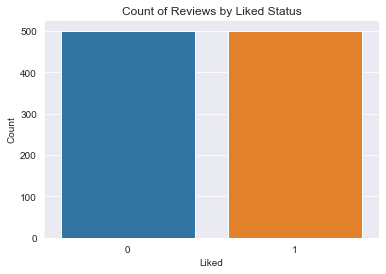

In [6]:
# Set the style of the plot
sns.set_style('darkgrid')

# Create a count plot of the "Liked" column
sns.countplot(x='Liked', data=data)

# Set the title of the plot
plt.title('Count of Reviews by Liked Status')

# Set the label for the x-axis
plt.xlabel('Liked')

# Set the label for the y-axis
plt.ylabel('Count')

# Show the plot
plt.show()

### Creating the Bag of Words model

In [7]:
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

### Build the Model using classification algorithms

### 1)Supprt vector Machine(SVM)

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [10]:
y_pred1 = classifier.predict(X_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[80 20]
 [20 80]]


0.8

### 2)Naive Bayes

In [12]:
# from sklearn.naive_bayes import GaussianNB
# Build the ML Model to predict the target value

from sklearn.naive_bayes import GaussianNB  
NaiveB = GaussianNB()  
NaiveB.fit(X_train,y_train)

GaussianNB()

In [13]:
naive_pred= NaiveB.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
naive_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, naive_pred)
print(cm)
accuracy_score(y_test, naive_pred)

[[80 20]
 [20 80]]


0.8

### Predicting if a single review is positive or negative

In [15]:
new_review = 'I am a good girl'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


The review was correctly predicted as positive by our model.

In [16]:
new_review = 'I am a bad girl'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


The review was correctly predicted as negative by our model.

### Conclusion

The motive of the model is to correctly detect the sentiments of the textual reviews or feedback. The developed model has an accuracy of 80% and successfully detects the sentiments of the textual reviews or feedback